In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Real estate value **predictor**

The Data set we are using here contains price , area , no of beds , no of balcony , stories , mainroad , guestroom , basement , etc .Our main aim to predict the value of property.

In [ ]:
#In order to read a CSV file into
df=pd.read_csv('house1.csv')
#method displays the first five rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [ ]:
# tail is use to displays the last five rows of the Dataset
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,unfurnished


In [ ]:
# It is use to select random 5 element and display it
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
528,2275000,3970,1,1,1,no,no,no,no,no,0,unfurnished
46,7525000,6000,3,2,4,yes,no,no,no,yes,1,furnished
41,7840000,6360,3,2,4,yes,no,no,no,yes,0,furnished
496,2695000,4000,2,1,1,yes,no,no,no,no,0,unfurnished
472,3010000,3630,4,1,2,yes,no,no,no,no,3,semi-furnished


In [ ]:
# It give us the summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [ ]:
#  It provide information on central tendencies, dispersion, and shape of the distribution for each numerical column
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# It tell us about how the data is stored or in which form
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
furnishingstatus    object
dtype: object

In [ ]:
#It returns a tuple representing the number of rows and columns in the DataFrame
df.shape

(545, 12)

In [ ]:
#This is the list out all the Column Names Present in the Data Frame
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus'],
      dtype='object')

In [ ]:
#It provides the count of valid (non-null) data points in each column
df.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
furnishingstatus    545
dtype: int64

In [ ]:
# Checking th no of duplicate row present in data set
duplicate_row_df = df[df.duplicated()]
print("THe number of duplicate rows are", duplicate_row_df.shape)

THe number of duplicate rows are (0, 12)


In [ ]:
# Find the no of missing value present in data frame
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [ ]:
# It is use to get the mean from the data frame
df.mean()

<ipython-input-14-27ca0f1e9f75>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

In [ ]:
# It is use to get the median from the data frame
df.median()

<ipython-input-15-9dfeee4ef117>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [ ]:
# It is use to get the max value from each column of the data frame
df.max()

price                  13300000
area                      16200
bedrooms                      6
bathrooms                     4
stories                       4
mainroad                    yes
guestroom                   yes
basement                    yes
hotwaterheating             yes
airconditioning             yes
parking                       3
furnishingstatus    unfurnished
dtype: object

In [ ]:
# It is use to get the min value from each column of the data frame
df.min()

price                 1750000
area                     1650
bedrooms                    1
bathrooms                   1
stories                     1
mainroad                   no
guestroom                  no
basement                   no
hotwaterheating            no
airconditioning            no
parking                     0
furnishingstatus    furnished
dtype: object

In [ ]:
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories','parking']

# Calculate the IQR for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Display the outliers in each numerical column
print(outliers.sum())

price        15
area         12
bedrooms     12
bathrooms     1
stories      41
parking      12
dtype: int64


In [ ]:
#Use Calculate skewness for each column
skewness = df[numerical_columns].skew()

#It  Display the skewness values
print(skewness)

price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64


<Axes: xlabel='airconditioning', ylabel='count'>

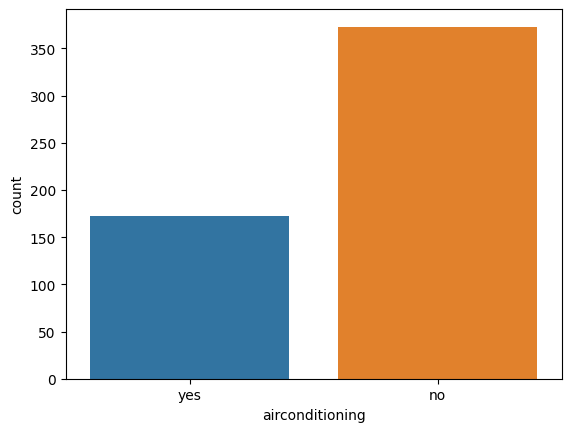

In [ ]:
# It check how many are having AC
sns.countplot(x='airconditioning',data = df)

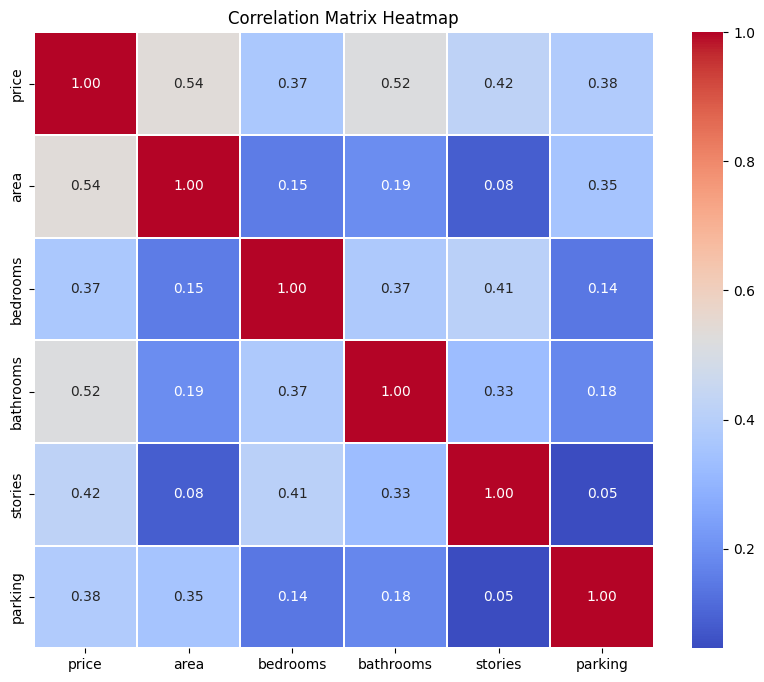

In [ ]:
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories','parking']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title('Correlation Matrix Heatmap')
plt.show()

<ipython-input-95-c14c56ce45ce>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='price', y='area', palette="Set1")


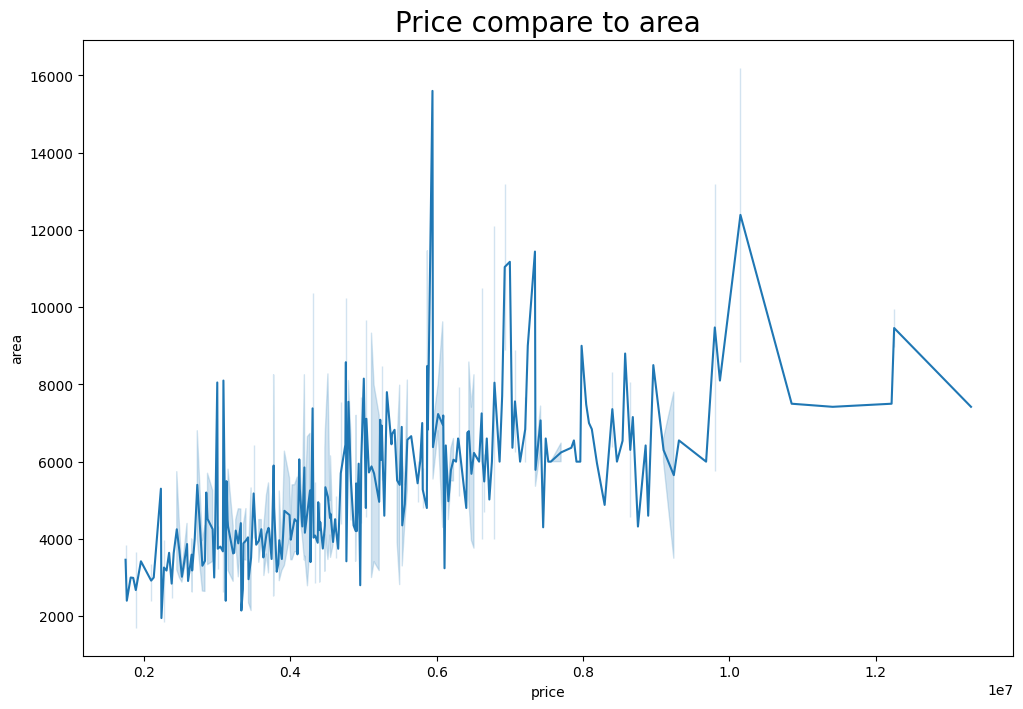

In [ ]:
 #comparing price with area
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='price', y='area', palette="Set1")
plt.title('Price compare to area', fontsize = 20)
plt.show()

<Axes: xlabel='area'>

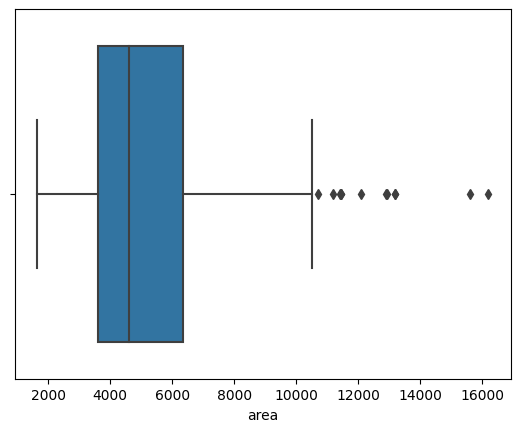

In [ ]:
sns.boxplot(x=df['area'])

<Axes: xlabel='price'>

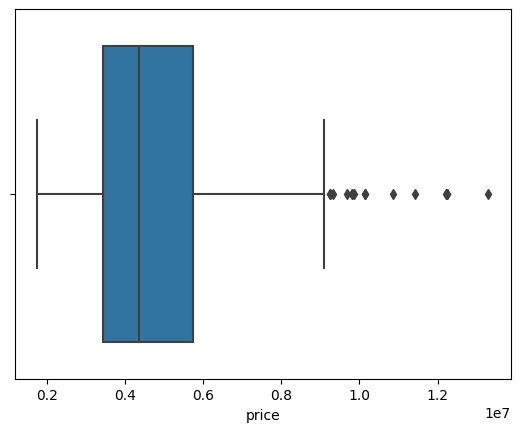

In [ ]:
sns.boxplot(x=df['price'])

In [ ]:
# Assuming df is your DataFrame with columns 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'airconditioning', 'parking', 'prefarea', and 'furnishingstatus'

# Features (X) - Selecting all columns except 'price'
X = df.drop('price', axis=1)

# Target variable (y) - Selecting only the 'price' column
y = df['price']

# Display the features (X) and target variable (y)
print("Features (X):")
print(X.head())
print("\nTarget variable (y):")
print(y.head())


Features (X):
   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  7420         4          2        3      yes        no       no   
1  8960         4          4        4      yes        no       no   
2  9960         3          2        2      yes        no      yes   
3  7500         4          2        2      yes        no      yes   
4  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  

Target variable (y):
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


In [ ]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,furnished


In [ ]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [ ]:
# Step 1: Load the dataset and perform mapping for categorical columns
df = pd.read_csv("house1.csv")

# Convert categorical values to numerical using .map()
categorical_mapping = {
    'yes': 1,
    'no': 0,
    'furnished': 2,
    'unfurnished': 0,
    'semi-furnished': 1
}

df['mainroad'] = df['mainroad'].map(categorical_mapping)
df['guestroom'] = df['guestroom'].map(categorical_mapping)
df['basement'] = df['basement'].map(categorical_mapping)
df['hotwaterheating'] = df['hotwaterheating'].map(categorical_mapping)
df['airconditioning'] = df['airconditioning'].map(categorical_mapping)
df['furnishingstatus'] = df['furnishingstatus'].map(categorical_mapping)

In [ ]:
#Checking the DataFrame if the Categorical values have converted to Numeric or not
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,2


In [ ]:
# Data Preprocessing
x = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','parking', 'furnishingstatus']]
y = df['price']



In [ ]:
# Step 3: Split data into training and testing sets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=101)


In [ ]:
#  Model Training (Using Linear Regression)
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

model  = LogisticRegression()
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)

# Modeling

In [ ]:
# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 2928384977064.22
Mean Absolute Error: 1169963.3027522936
R-squared: 0.1770109132732699


In [ ]:
#User Input
area = float(input("Enter the Area of the Property: "))
bedrooms = float(input("Enter the Number of Bedrooms: "))
bathrooms = float(input("Enter the Number of Bathrooms: "))
stories = float(input("Enter the Number of Stories: "))
mainroad = float(input("Is the Property near Mainroad Yes(1)/No(0): "))
guestroom = float(input("Does the Property has Guestroom Yes(1)/No(0): "))
basement = float(input("Does the Property has Basement Yes(1)/No(0): "))
hotwater = float(input("Does the Property has Hot watering Yes(1)/No(0): "))
ac = float(input("Does the Property has Air Conditioning Yes(1)/No(0): "))
park = float(input("Enter the Number of Parking: "))
furniture = float(input("Enter the Furnishing Status Unfurnished(0), Semi-furnished(1), or Furnished(2): "))
user_input = [[area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwater, ac, park, furniture]]

Enter the Area of the Property: 12344
Enter the Number of Bedrooms: 2
Enter the Number of Bathrooms: 2
Enter the Number of Stories: 1
Is the Property near Mainroad Yes(1)/No(0): 1
Does the Property has Guestroom Yes(1)/No(0): 1
Does the Property has Basement Yes(1)/No(0): 1
Does the Property has Hot watering Yes(1)/No(0): 1
Does the Property has Air Conditioning Yes(1)/No(0): 1
Enter the Number of Parking: 2
Enter the Furnishing Status Unfurnished(0), Semi-furnished(1), or Furnished(2): 2


In [ ]:
user_pred = model.predict(user_input)
print("The Price of the Property is:-",user_pred)

The Price of the Property is:- [5943000]


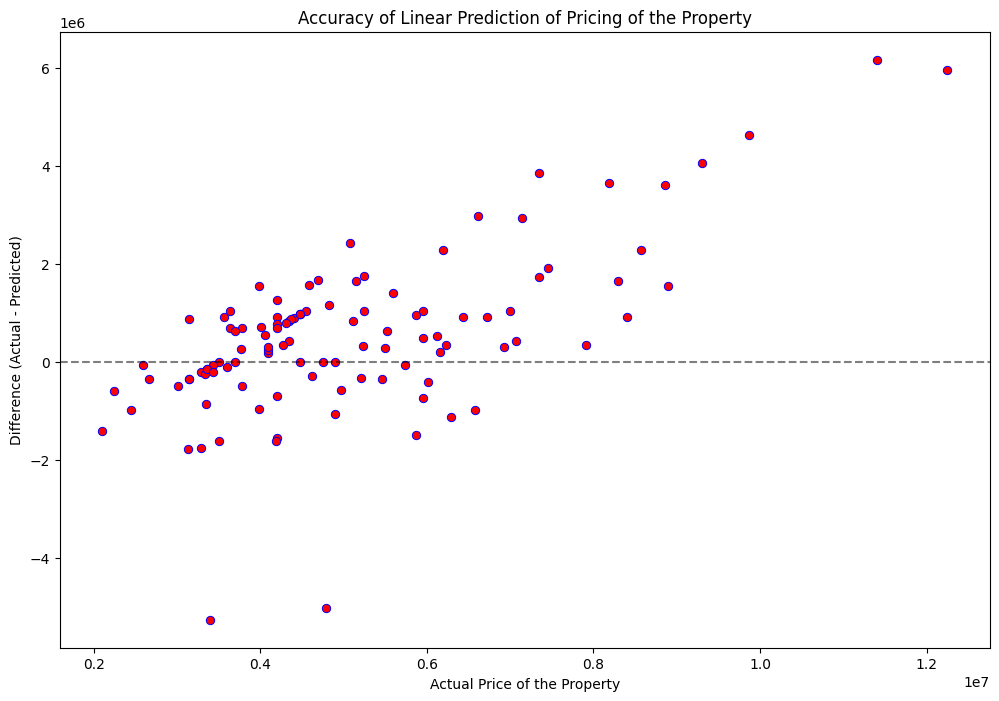

In [ ]:
ytest = np.array(ytest)
y_pred = np.array(y_pred)

# Calculate the difference between actual and predicted followers gained
difference = ytest - y_pred

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(ytest, difference, color='red', edgecolor='blue', linewidth=0.7)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)  # Horizontal line at y=0
plt.xlabel('Actual Price of the Property')
plt.ylabel('Difference (Actual - Predicted)')
plt.title("Accuracy of Linear Prediction of Pricing of the Property")
plt.show()

# Conclusion

To enhance the predictive performance of the model, feature engineering, data preprocessing, and validation techniques can be employed. Furthermore, considering alternative regression models or employing advanced techniques such as regularization may improve the model's ability to generalize well to unseen data.

In conclusion, while linear regression can serve as a valuable tool for predicting property values, it is essential to continuously refine the model and consider its limitations to make informed and accurate predictions in real-world scenarios.